# 例題で学ぶ代表値と散布度

以下の説明例は演習ファイルフォルダにあるファイルを通じて，Google Colabolatory（以下Colabと短縮表記する）で実行可能なプログラムが提供されている．リテラシーの内容ではプログラムを実行することで学べる知識を要求しないが，実際のデータ分析に興味をもつ人は試してみるとよい．

▶︎マークで始まる部分はRの実行プログラムである（これはColab上で実行するときのみの表示）

## サンプルデータの準備

ここでは[スポーツナビサッカー代表トップ](https://soccer.yahoo.co.jp/japan/)
にあった，2021年10月18日現在のサッカー日本代表選手（A代表MEN，男子五輪代表OLYM，女子代表WOMEN）の身長Height，体重Weight，年齢Ageの各データを取得したものを利用して
これらデータ全体（データ分析ではデータフレームと呼ぶ）の名前をJapanとして利用している．男女五輪の別は変数Propertyにもっている．

### サンプルデータの読み込みプログラム

以下はサンプルデータの読み込みプログラムおよび最初の6行の表示および変数の準備である．ただし，このプログラムはリテラシー解説から除外してある．また実行しないとわからない演習問題もリテラシー解説から除外してある．




In [2]:
# CSVファイルの読み込み
# 変数名Japanに保存
Japan <- read.csv("SCMEM20211018.csv", stringsAsFactors=TRUE)
# はじめの6行を表示，
head(Japan)
# データの構成を表示
# PropertyはMEN, OLYM, WOMの3種で構成されている
# それぞれ男子，五輪，女子メンバーに対応する
# summary(Japan)
# 変数名MenにPropertyの値がMENであるデータを代入
Men <- Japan[Japan$Property=="MEN",]
# 変数名WomenにPropertyの値がWOMであるデータを代入
Women <- Japan[Japan$Property=="WOM",]
# 変数名OlymにPropertyの値がOLYMであるデータを代入
Olym <- Japan[Japan$Property=="OLYM",]

,Property,Height,Weight,Age
,<fct>,<int>,<int>,<int>
1,MEN,185,82,38
2,MEN,187,84,32
3,MEN,190,84,20
4,MEN,182,73,22
5,MEN,186,77,26
6,MEN,176,69,27


## 代表値を読む

ここではデータフレームJapanの各種処理結果から3種の代表値（平均値，中央値，最頻値）を読み取っていく．

> データ分析ツールRに関する話．

> 以下ではR特有のデータフレームの参照方法による記述の煩雑さあを減らすため，上のPropertyがMEN，WOMEN，PLYMである各データをそれぞれ変数Men,Women，Olymに分けてある．各変数に対して，たとえば身長Heightは変数と$記号をつないでMen$Heightとして参照している．


### 5数要約，度数分布，箱ヒゲ図の表示

5数要約とはデータの第0四分位数（最小値Minimum，省略形Min），第1四分位数（小さい方から25％の値，省略形1st Qu.），第2四分位数（中央値Median），第3四分位数（小さい方から75％の値，省略形3rd Qu.），第4四分位数（最大値Maximum，省略形Max）にまとめることをいいます．
通常は第0および第4四分位数の呼び方をしないが，
これらの値を計算する関数summaryを利用するときに，こう考えておくと便利である．
以下ではMen，Women，Plymの各代表カテゴリーに対して年齢Ageの5数要約を表示させた．
Rの関数summaryでは5数要約の各値の他に平均値Meanも表示している．


In [3]:
# 5数要約
# 関数summaryは5数要約および平均値を表示する
summary(Men$Age)
summary(Olym$Age)
summary(Women$Age)
# Propertyの一つ，年齢Ageの箱ヒゲ図
# 各変数の特定のPropertyに関する値を使うには
# 変数名に続けて$記号，指定するProperty（ここではAge）を並べた

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   24.00   26.00   27.24   30.00   38.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   22.00   23.00   23.68   24.00   33.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   22.50   25.00   24.83   26.00   31.00 

箱ヒゲ図は5数要約の情報と外れ値によりデータの分布（ばらつきの様子）を図示する．

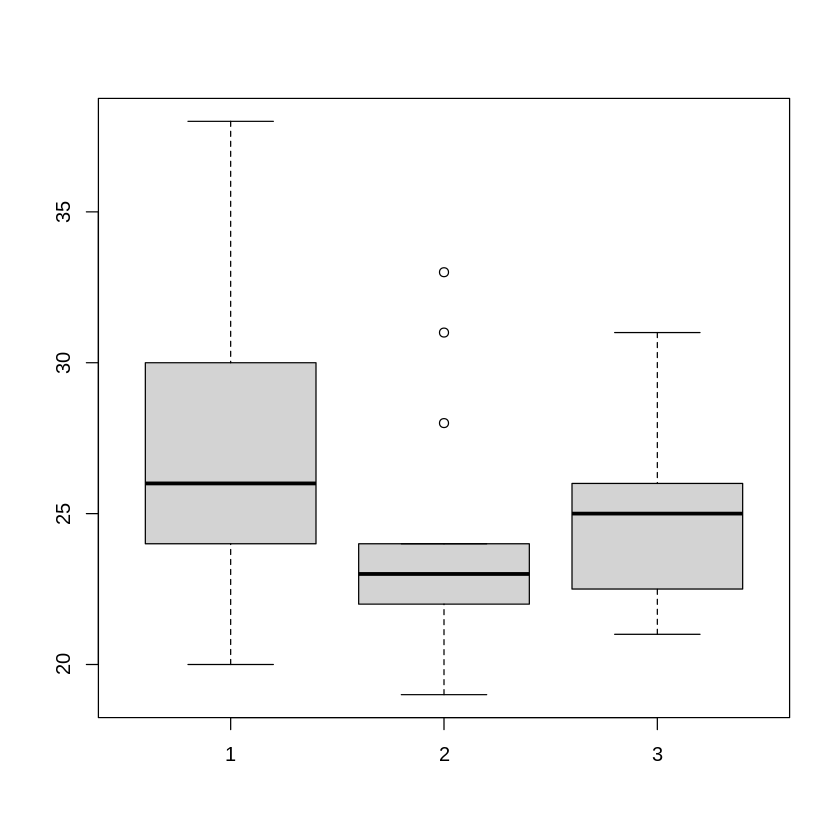

In [4]:
# 関数boxplotは箱ヒゲ図を表示する
# boxplotには複数の変数を与えることができる
boxplot(Men$Age, Olym$Age, Women$Age)

この箱ヒゲ図にもとづき分布の様子を比較すると，2番目の変数Olym（五輪代表）に対応するものだけ箱ヒゲ図の上バーがなく，また，丸で表された3点（外れ値）がある．
これは五輪代表メンバーは23歳以下から構成される規則があることと，オーバーエイジ（23歳を超える選手）の3人がいるという制約を反映しているという事実を，箱ヒゲ図から想像できるのである．

> 箱ヒゲ図の基礎知識：箱の中の太い線が中央値を表し，箱の上下端は下端が第1四分位数，上端が第3四分位数を表す．
第3四分位数と第1四分位数の差を四分位範囲といい，四分位範囲の1.5倍の値までの範囲で最大（箱の上），同じくその範囲で最小（箱の下）にヒゲとして表す．
それを超える値を外れ値といい，○などで表す．

### 外れ値に関する注意

高校数学Iで扱う箱ヒゲ図では，2021年までは外れ値を表示しないものであった．
2022年の数学Iからは，外れ値も表示す．
2021年までの数学Iで勉強した人は資料「高校数学指導要領からの抜粋」で確認してほしい．

問：3つの箱ヒゲ図のそれぞれに，平均値および中央値はどこらへんにあるだろうか，
箱ヒゲ図の中にイメージしてみよう．

### プログラムを修正して実行するためのヒント

ここでたとえば「Men$Age」とあるのは，変数Menの中の年齢Ageを参照するための書き方である．
このAgeをHeightにすれば身長，Weightにすれば体重を参照できる．
プログラム上で直接に書き換えて実行（▶︎ボタンをクリック）することもできる．

問：身長Height，体重Weightについてもsummaryを表示させてみよ．
身長Height，体重Weightについても箱ヒゲ図を表示させてみよ．

### いくつかの図示

箱ヒゲ図でもそれぞれの値の分布の様子はわかるが，次に示す幹葉図なら値の分布の様子までわかる．
データの値の上位桁を「幹」，下位桁を「葉」に見立てている．
この図にある数値にもとづき，もとのデータ全体を復元することができるので試してほしい．

最頻値はデータを適当な階級に分けたときに，最もデータの個数（度数）の多い階級値のことである．
階級の与え方次第で，最頻値は異なる値になる．
この幹葉図では，5ずつに分けた階級における最頻値を，葉にあたる数の個数から読み取ることができる．


In [ ]:
# stemは幹葉図を与える関数
stem(Men$Age)
stem(Olym$Age)
stem(Women$Age)


  The decimal point is 1 digit(s) to the right of the |

  2 | 0223444
  2 | 55666667889
  3 | 01123
  3 | 58


  The decimal point is 1 digit(s) to the right of the |

  1 | 9
  2 | 001222333334444444
  2 | 8
  3 | 13


  The decimal point is 1 digit(s) to the right of the |

  2 | 11122234444
  2 | 5555666779
  3 | 11



問　上の幹葉図は階級幅を5として，その端数を並べていることになる．
これらの幹葉図をもとに階級を5ごとに区切った度数分布表を作成してみよう．
女子代表の度数分布表のみ以下に示しておく．

| 階級 | 度数 |
|:--------:|---:|
| 20--24 | 11 |
| 25--29 | 10 |
| 30--34 | 2 |

この幹葉図は，標準的なデータ集計法である度数分布表やヒストグラムに準じたものとして考えることもできる．

次に単純集計をしてみよう．
Rで単純に集計するにはtable関数を使う．

In [ ]:
# 各カテゴリーの年齢ごとの度数を集計する
table(Men$Age)
table(Olym$Age)
table(Women$Age)


20 22 23 24 25 26 27 28 29 30 31 32 33 35 38 
 1  2  1  3  2  5  1  2  1  1  2  1  1  1  1 


19 20 21 22 23 24 28 31 33 
 1  2  1  3  5  7  1  1  1 


21 22 23 24 25 26 27 29 31 
 3  3  1  4  4  3  2  1  2 

問　先ほどは幹葉図から度数分布表を作成してみた．
今度はこの出力結果から度数分布表を作成してみよう．

問：身長Height，体重Weightについても幹葉図を作成してみよ．

ヒストグラムは連続変量に対して，各階級ごとに棒で表す棒グラフの一種である．
連続変量なので各棒は隣同士を接して描く．
以下の例はRのhist関数に自動で階級を作らせた．

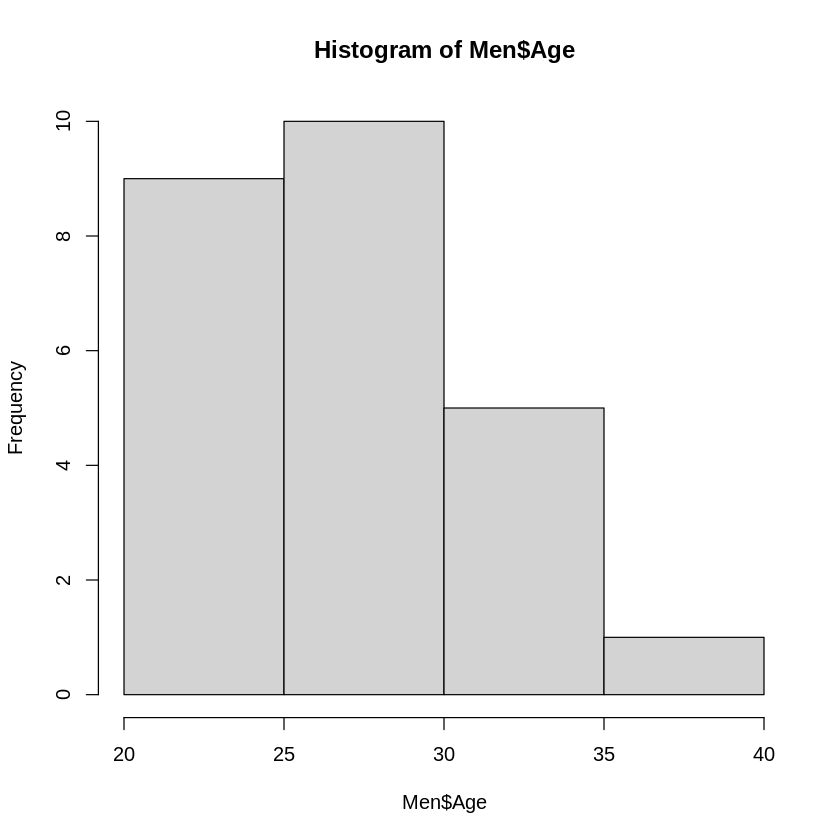

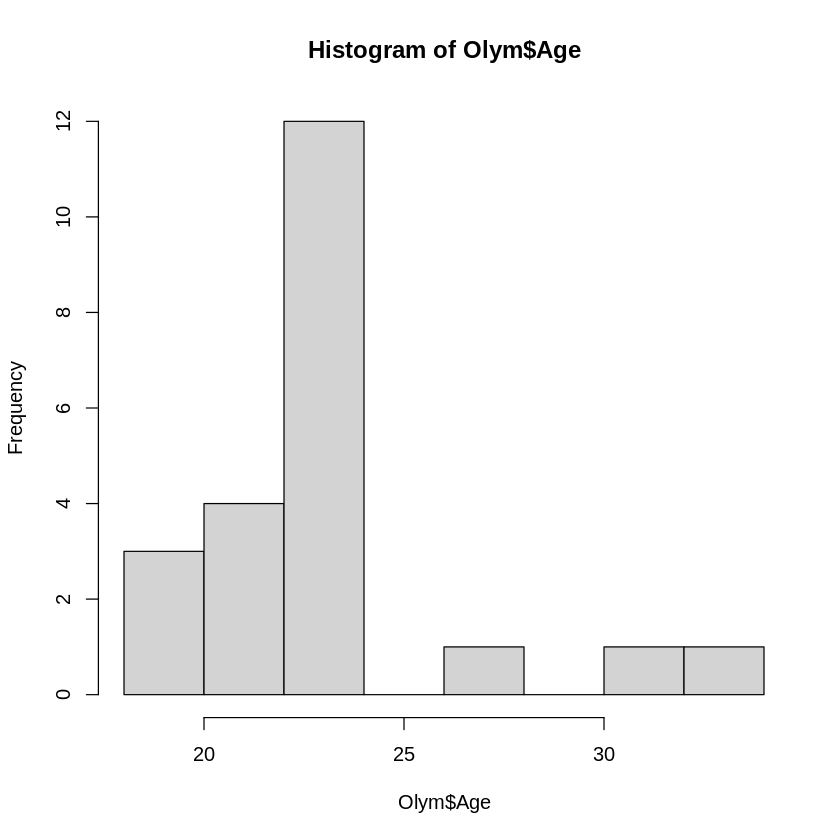

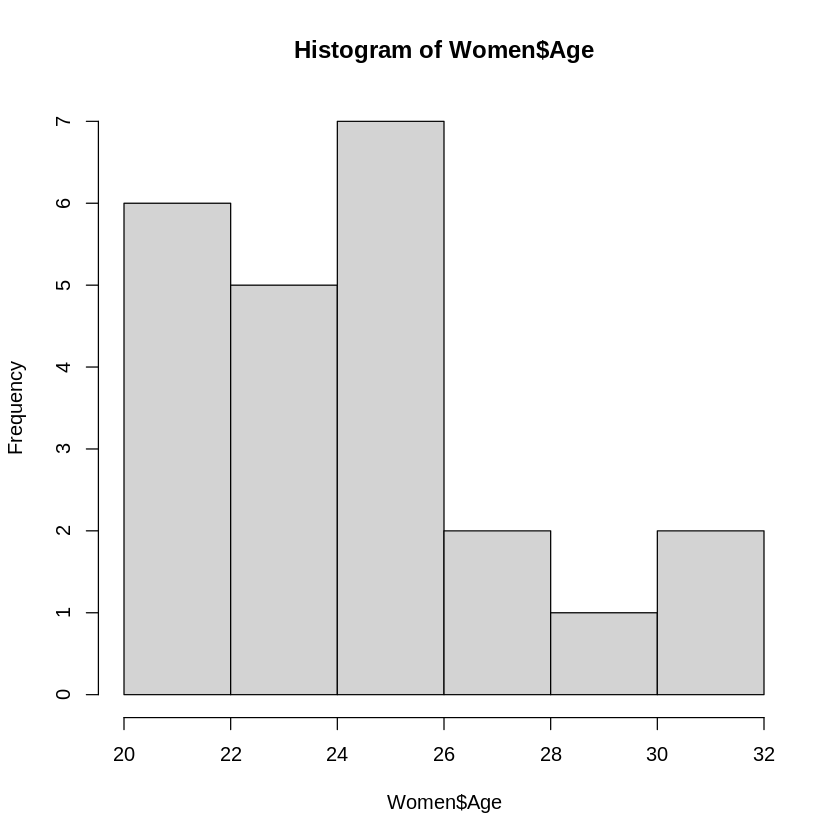

In [ ]:
# 各カテゴリーの年齢ごとのヒストグラムを表示する
hist(Men$Age)
hist(Olym$Age)
hist(Women$Age)

問：身長Height，体重Weightについてもヒストグラムを表示させてみよ．



> 研究：階級はどのように分けたらよいのだろうか．
通常はわかりやすい区切りの良い値にもとづき幅を設けること，階級の個数が多すぎず少なすぎずに選ぶ．
また上の例のように相互に比較したい場合は，階級を共通にとるほうがよい．
なお階級の個数を与えるスタージェスの公式やデータの個数（サンプルサイズ）の平方根（小数点以下切り捨て）などが推奨されているが，決まったルールがあるわけではない．

### 分散の利用

5数要約と合わせて紹介した箱ヒゲ図では，四分位範囲で代表値近くのデータの分布（散らばり方）を表していた．
ここでは，平均値と合わせてよく使われる分散（関数var）および標準偏差（＝分散の平方根，関数sd）を扱う．

注意：データ分析では分散に不偏分散を用いる．
不偏分散の式のみあげるが，そのような式を用いる理由はリテラシーのレベルを超えるので，ここでは説明しない．
この分散は高校で扱った分散の式と少し異なるので注意したい．

In [ ]:
# 上のデータの男子年齢を変数名xに代入して
# 簡単に参照できるようにして以下の例題を扱う
# <- 記号はRで左側の変数名への値の代入を表す
x <- Men$Age
# 平均値
mean(x)
# 分散
var(x)
# 標準偏差
sd(x)

[1] 27.24

[1] 18.60667

[1] 4.313545

高校数学Iで扱った平均値の公式
$$\bar{x}=\frac{1}{n}\sum_{k=1}^n x_k$$
および分散の公式
$$\frac{1}{n}\sum_{k=1}^n (x_k-\bar{x})^2$$
を扱っている．
不偏分散は
$$\frac{1}{n-1}\sum_{k=1}^n (x_k-\bar{x})^2$$
となる．
以下の計算例では，上の関係も確かめている．
リテラシーの受講者は，上に述べた値を計算する関数が用意されている以上のことは気にしなくてよい．
Rの数式計算の特徴をうまく使っているために，数学の計算式と思うと不思議なところもある．


In [ ]:
# 関数lengthで公式のnにあたる量を求めている
# これをベクトルのサイズという
sum(x)/length(x)
# 式 x-mean(x)を偏差という
# 分散をことばでいうと，偏差の2乗平均である
sum((x-mean(x))^2)/length(x)
# 上の値は関数varのものと一致しない
# var関数と一致するのは次の式の値である
# 割り算の分母が少し小さい
n <- length(x)
sum((x-mean(x))^2)/(n-1)
var(x)
# 次の計算をすれば上の公式と一致する
var(x)*(n-1)/n

[1] 27.24

[1] 17.8624

[1] 18.60667

[1] 18.60667

[1] 17.8624

## 参考：箱ヒゲ図の作成

男子五輪代表の箱ヒゲ図の成り立ちを説明するのに，その集計を再掲する．

ここで改めて，同じxに対して平均値，標準偏差，ヒストグラムを計算させます．
さらに平均値±標準偏差および平均値±2倍の標準偏差を計算しておきました．

問：上の各値はヒストグラムのどこに読み取れるでしょうか．

In [5]:
table(Olym$Age)


19 20 21 22 23 24 28 31 33 
 1  2  1  3  5  7  1  1  1 


箱ヒゲ図作成のルールは以下の通りである．

四分位数に対して，第3四分位数と第1四分位数の差を四分位範囲（箱ヒゲ図の高さになる），その半分を四分位偏差という．
箱の中の太い線が中央値を表し，はこの上下端は下端が第1四分位数，上端が第3四分位数を表す．
四分位範囲の1.5倍の値までの範囲で最大（箱の上端），同じくその範囲で最小（下端）にヒゲとして表す．
それを超える値を外れ値といい，◯などで表す．

上のデータをもとに各値を求めてみよう．

* データの総数　22
* 最小値　19
* 最大値　33
* 中央値　23
* 第1四分位数　22
* 第3四分位数　24
* 四分位範囲　2
* 四分位偏差　1
* 四分位範囲の1.5倍　3
* 第3四分位数＋四分位範囲の1.5倍　27

この値以下で最大のデータは24なので箱の上側のヒゲは，箱の上端に一致する．
この値より大きな値，つまりオーバーエイジの人たちは外れ値になる．

